In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [47]:
df = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_properties_missing_values_imputed")

In [48]:
df.head()

,Unnamed: 0,society,price,sector,price_per_sqft,property_type,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
0,0,ireo victory valley,2.99,sector 67,11832.0,flat,2200.000,3.0,3.0,3,4.0,relatively new,1.0,0.0,0.0,0.0,0.0,0.0,37.0
1,1,signature global park,0.58,sohna road,7056.0,flat,817.159,2.0,2.0,2,3.0,relatively new,0.0,0.0,0.0,0.0,0.0,1.0,58.0
2,2,chd avenue,0.95,sector 71,7917.0,flat,1192.836,2.0,2.0,0,5.0,moderately old,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,ansal maple heights,1.50,sector 43,12658.0,flat,1385.000,3.0,3.0,3+,7.0,old property,0.0,0.0,0.0,0.0,1.0,0.0,174.0
4,4,sector 15 part 2 rwa,10.00,sector 15,22222.0,house,4491.218,5.0,5.0,2,2.0,old property,0.0,0.0,0.0,0.0,0.0,1.0,49.0


In [49]:
df.to_csv("gurgaon_properties_post_feature_selection_v2.csv", index=False)

In [50]:
#we will drop society column and price_per_sqft temporarily because we are not going to ask society as an input to our user
#(if user knows the society then he can easily get price from internet so why will he need our model? that is why we are removing society column)
#same for price_per_sqft

train_df = df.drop(['Unnamed: 0', 'price_per_sqft', 'society'], axis = 1)

In [51]:
train_df.shape

(3591, 16)

<ipython-input-52-bd8140b253d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot = True)


<Axes: >

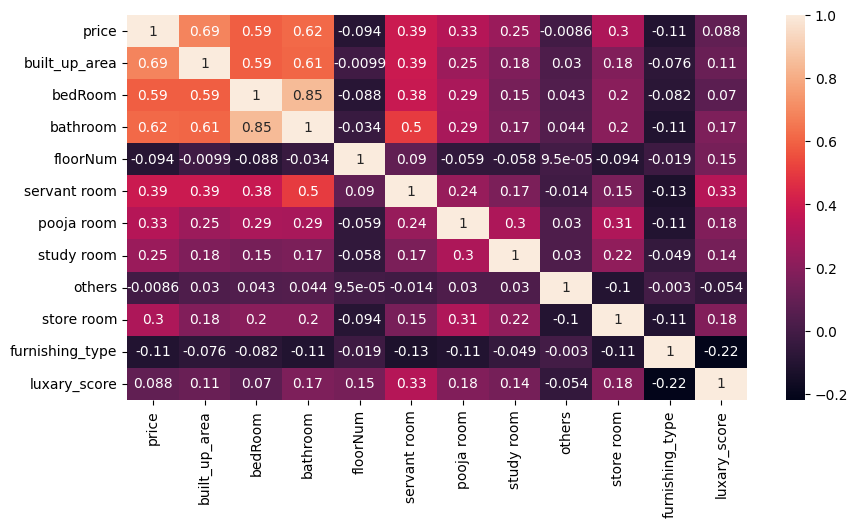

In [52]:
plt.figure(figsize = (10,5))
sns.heatmap(train_df.corr(), annot = True)

In [53]:
train_df.corr()['price'].sort_values(ascending = False)

<ipython-input-53-2fb0e1b9a592>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['price'].sort_values(ascending = False)


price              1.000000
built_up_area      0.689381
bathroom           0.617332
bedRoom            0.586915
servant room       0.389646
pooja room         0.325830
store room         0.300742
study room         0.248012
luxary_score       0.087921
others            -0.008639
floorNum          -0.093595
furnishing_type   -0.105954
Name: price, dtype: float64

In [54]:
df['furnishing_type'].value_counts()

1.0    2363
0.0    1030
2.0     198
Name: furnishing_type, dtype: int64

In [55]:
train_df.head()

,price,sector,property_type,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
0,2.99,sector 67,flat,2200.000,3.0,3.0,3,4.0,relatively new,1.0,0.0,0.0,0.0,0.0,0.0,37.0
1,0.58,sohna road,flat,817.159,2.0,2.0,2,3.0,relatively new,0.0,0.0,0.0,0.0,0.0,1.0,58.0
2,0.95,sector 71,flat,1192.836,2.0,2.0,0,5.0,moderately old,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.50,sector 43,flat,1385.000,3.0,3.0,3+,7.0,old property,0.0,0.0,0.0,0.0,1.0,0.0,174.0
4,10.00,sector 15,house,4491.218,5.0,5.0,2,2.0,old property,0.0,0.0,0.0,0.0,0.0,1.0,49.0


#luxary score

we can not ask the user for luxary score because he do not know what does luxary score = 58 means. so we will convert this column into category

<Axes: xlabel='luxary_score'>

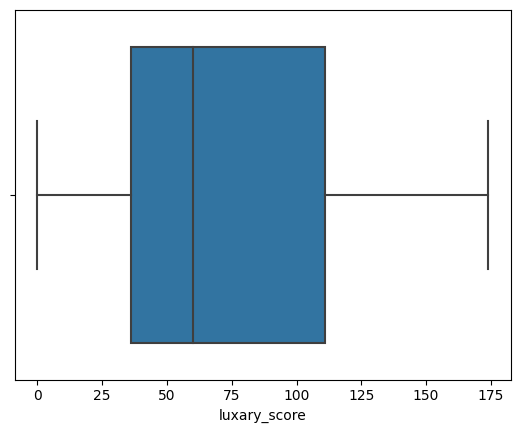

In [56]:
sns.boxplot(x = train_df['luxary_score'])

In [57]:
def categorize_luxary (score):
  if 0 <= score <50:
    return 'Low'
  elif 50 <= score <150:
    return 'Medium'
  elif 150 <= score <175:
    return 'High'
  else:
    return None

In [58]:
train_df['luxury_category'] = train_df['luxary_score'].apply(categorize_luxary)

In [59]:
train_df.sample(5)

,price,sector,property_type,built_up_area,bedRoom,bathroom,balcony,floorNum,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score,luxury_category
2248,13.20,sector 50,house,4832.120000,6.0,6.0,0,2.0,moderately old,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low
323,8.44,sector 43,flat,5000.000000,4.0,5.0,3,9.0,moderately old,1.0,0.0,0.0,0.0,0.0,2.0,117.0,Medium
2,0.95,sector 71,flat,1192.836000,2.0,2.0,0,5.0,moderately old,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Low
320,2.25,sector 43,house,3000.000000,11.0,11.0,3+,5.0,new Property,0.0,0.0,0.0,1.0,0.0,2.0,28.0,Low
564,1.35,sector 86,flat,1735.498607,3.0,3.0,1,9.0,relatively new,0.0,0.0,0.0,0.0,0.0,1.0,119.0,Medium


#floor number

<Axes: xlabel='floorNum'>

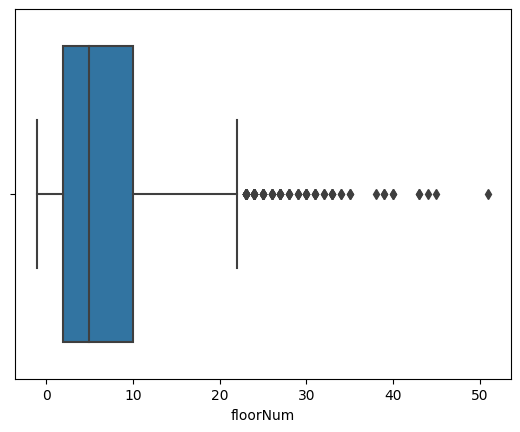

In [60]:
#rather than asking number of flooers we will categorize it into 'low floor','median floor','high floor'
sns.boxplot(x = train_df['floorNum'])

In [61]:
train_df['floorNum'].isna().sum()

0

In [62]:
def categorize_floor (score):
  if 0 <= score <=2:
    return 'Low Floor'
  elif 3 <= score <=10:
    return 'Medium Floor'
  elif 11 <= score <=60:
    return 'High Floor'
  else:
    return None

In [63]:
train_df['floorNum'].apply(categorize_floor)

0       Medium Floor
1       Medium Floor
2       Medium Floor
3       Medium Floor
4          Low Floor
            ...     
3586       Low Floor
3587    Medium Floor
3588    Medium Floor
3589       Low Floor
3590       Low Floor
Name: floorNum, Length: 3591, dtype: object

In [64]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [65]:
train_df.drop(['floorNum', 'luxary_score'], inplace = True, axis = 1)

In [66]:
train_df['floor_category'].value_counts()

Medium Floor    1817
Low Floor        941
High Floor       831
Name: floor_category, dtype: int64

In [67]:
train_df.head()

,price,sector,property_type,built_up_area,bedRoom,bathroom,balcony,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxury_category,floor_category
0,2.99,sector 67,flat,2200.000,3.0,3.0,3,relatively new,1.0,0.0,0.0,0.0,0.0,0.0,Low,Medium Floor
1,0.58,sohna road,flat,817.159,2.0,2.0,2,relatively new,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium Floor
2,0.95,sector 71,flat,1192.836,2.0,2.0,0,moderately old,0.0,0.0,0.0,0.0,0.0,1.0,Low,Medium Floor
3,1.50,sector 43,flat,1385.000,3.0,3.0,3+,old property,0.0,0.0,0.0,0.0,1.0,0.0,High,Medium Floor
4,10.00,sector 15,house,4491.218,5.0,5.0,2,old property,0.0,0.0,0.0,0.0,0.0,1.0,Low,Low Floor


In [68]:
train_df.isna().sum()

price              0
sector             0
property_type      0
built_up_area      0
bedRoom            0
bathroom           0
balcony            0
agePossession      0
servant room       0
pooja room         0
study room         0
others             0
store room         0
furnishing_type    0
luxury_category    0
floor_category     2
dtype: int64

##Applying Ordinal encoder to convert categories to numerical

In [69]:
#import the OrdinalEncoder to convert categories to numeric value
from sklearn.preprocessing import OrdinalEncoder


data_label_encoded = train_df.copy()

#extracting the name of categorical columns
categorical_cols = train_df.select_dtypes(include = ['object']).columns

for col in categorical_cols:
  oe = OrdinalEncoder()
  data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])

#seperate output column
x_label = data_label_encoded.drop('price', axis = 1)
y_label = data_label_encoded['price']

###*note that ordinal encoding assumes an ordinal relationship between the categories, meaning one category is higher or lower than another. If there is no meaningful order among the categories, using ordinal encoding might introduce unintended patterns in the data. In such cases, other techniques like one-hot encoding or target encoding might be more appropriate, depending on the specific use case.*
###But if we use tree based model then it will not cause any issue because in tree based models does not consider ordinal relationship between the categories, meaning one category is higher or lower than another i.e  it will not consider category 2 is better than 1.

###But if you use linear models then it will cause the issue .It will consider category 2 is greater than 1. so in that case rather than using ordinal encoding use one hot encoding

In [70]:
y_label

0        2.99
1        0.58
2        0.95
3        1.50
4       10.00
        ...  
3586     3.69
3587     1.10
3588     0.80
3589     3.50
3590     2.04
Name: price, Length: 3591, dtype: float64

Now we will do featur selection using different different techniques. Each technique will give some score to each feature. at the end we will combine all the score from different feature selection techniques and will select the most important feature

#Technique 1 : Correlation Analysis

<Axes: >

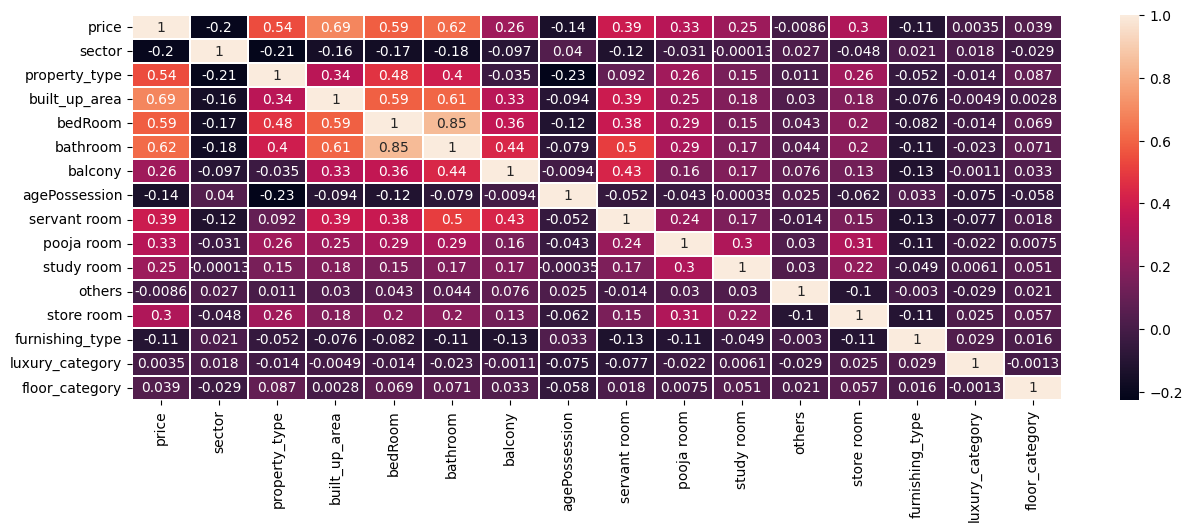

In [71]:
plt.figure(figsize = (15,5))
sns.heatmap(data_label_encoded.corr(), annot = True, linewidth = 0.02)

In [72]:
fi_df1 = data_label_encoded.corr()['price'].reset_index().rename(columns = {'index' : 'features', 'price' : 'corr_coeff'})
fi_df1.sort_values(by = 'corr_coeff', ascending = False)

,features,corr_coeff
0,price,1.000000
3,built_up_area,0.689381
5,bathroom,0.617332
4,bedRoom,0.586915
2,property_type,0.544344
8,servant room,0.389646
9,pooja room,0.325830
12,store room,0.300742
6,balcony,0.260436
10,study room,0.248012


#Technique 2 :  RandomForestRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_label, y_label)

RandomForestRegressor(random_state=42)

In [74]:
rf.feature_importances_

array([0.11348801, 0.09770641, 0.64085992, 0.02416797, 0.03009866,
       0.01320258, 0.01502541, 0.01838175, 0.00476309, 0.00708248,
       0.00367135, 0.00799134, 0.00971596, 0.00799617, 0.00584891])

In [75]:
fi_df2 = pd.DataFrame({'features' : x_label.columns, 'rf_importance' : rf.feature_importances_}).sort_values(by = 'rf_importance', ascending = False)
fi_df2

,features,rf_importance
2,built_up_area,0.640860
0,sector,0.113488
1,property_type,0.097706
4,bathroom,0.030099
3,bedRoom,0.024168
7,servant room,0.018382
6,agePossession,0.015025
5,balcony,0.013203
12,furnishing_type,0.009716
13,luxury_category,0.007996


we can see the built_up_area and sector are the most important features. This indicates this features has been used a lot in decision tree for spliting

#Technique_3 : Gradient Boosting Feature importances

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

gb =  GradientBoostingRegressor()

gb.fit(x_label, y_label)

GradientBoostingRegressor()

In [77]:
gb.feature_importances_

array([1.14981937e-01, 1.02906822e-01, 6.84675681e-01, 2.34976267e-02,
       3.40174458e-02, 1.70643041e-03, 3.45501458e-03, 2.17591072e-02,
       4.52003275e-05, 2.95122791e-03, 2.72489018e-04, 7.60595140e-03,
       1.34005298e-03, 2.09043685e-04, 5.75970429e-04])

In [78]:
fi_df3 = pd.DataFrame({'features' : x_label.columns, 'gb_importance' : gb.feature_importances_}).sort_values(by = 'gb_importance', ascending = False)
fi_df3

,features,gb_importance
2,built_up_area,0.684676
0,sector,0.114982
1,property_type,0.102907
4,bathroom,0.034017
3,bedRoom,0.023498
7,servant room,0.021759
11,store room,0.007606
6,agePossession,0.003455
9,study room,0.002951
5,balcony,0.001706


simillar to random forest in gradient boosting also the built_up_area and sector have high feature importance

#Technique_4 : Permutation Importance



How this technique works?

* suppose you have a data set f1|f2|f3|target
* Now you applay ml model and calculate the accuracy score. lets say we got accuracy score = 0.82
* Now you keep the f2,f3 and target as it is and shuffle the feature f1 then calculate the accuracy. lets say we got 0.62.
* If accuracy decreases this indicates the feature f1 was important feature

In [79]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [80]:

X_train, X_test, y_train, y_test = train_test_split(x_label, y_label, test_size = 0.2, random_state = 42)

#applay randomforest
rf_label = RandomForestRegressor(n_estimators = 100, random_state = 42 )
rf_label.fit(X_train, y_train)

#applying permutation_importance
perm_importance = permutation_importance(rf_label, X_test, y_test, n_repeats = 30, random_state = 42)

In [81]:
perm_importance.importances_mean

array([ 1.92017640e-01,  2.44377184e-01,  7.10760269e-01,  2.29163922e-02,
        1.63321194e-02,  8.03468666e-03,  4.98001753e-03,  2.83486861e-02,
        1.30761631e-03,  9.04352844e-05,  1.86995790e-03,  5.19815344e-04,
       -9.42049151e-04,  5.16320852e-03,  3.56729223e-03])

In [82]:
fi_df4 = pd.DataFrame({'features' : x_label.columns, 'perm_importance' : perm_importance.importances_mean}).sort_values(by = 'perm_importance', ascending = False)
fi_df4

,features,perm_importance
2,built_up_area,0.710760
1,property_type,0.244377
0,sector,0.192018
7,servant room,0.028349
3,bedRoom,0.022916
4,bathroom,0.016332
5,balcony,0.008035
13,luxury_category,0.005163
6,agePossession,0.004980
14,floor_category,0.003567


here some features have negative feature importance which indicates. in permutation importance negative feature importance means after shuffling that column you ggetting better accuracy

# Technique_5 : Lasso

we know lasso shrinks the coefficient which is less important upto the zero. Due to this we can use lasso for feature selection

Note that Lasso is the linear ml model. Since it is a linear model we can not relay much on it because we have used ordinal encoding.

In [83]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

lasso = Lasso(alpha = 0.01, random_state = 42)
lasso.fit(x_scaled, y_label)
fi_df5 = pd.DataFrame({'features' : x_label.columns, 'lasso_importance' : lasso.coef_}).sort_values(by = 'lasso_importance', ascending = False)
fi_df5

,features,lasso_importance
2,built_up_area,1.193401
1,property_type,0.793834
4,bathroom,0.489019
7,servant room,0.217013
11,store room,0.205806
9,study room,0.175629
8,pooja room,0.088358
13,luxury_category,0.037925
5,balcony,-0.003037
14,floor_category,-0.013965


we can see even tho sector is one of the important column but because of ordinal encoding the linear model lasso is wrongly giving least feature importance to it

#Technique_6 : RFE (recurssive feature elimination)

recursive feature selection is one of the most reliable feature selection technique. It removes the feature and calculates the accuracy score based on this concept it decides the importanc of each feature

In [85]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

selector_label = RFE(estimator, n_features_to_select= x_label.shape[1], step = 1)
selector_label.fit(x_label, y_label)

RFE(estimator=RandomForestRegressor(), n_features_to_select=15)

In [86]:
selected_columns = x_label.columns[selector_label.support_]
selected_columns

Index(['sector', 'property_type', 'built_up_area', 'bedRoom', 'bathroom',
       'balcony', 'agePossession', 'servant room', 'pooja room', 'study room',
       'others', 'store room', 'furnishing_type', 'luxury_category',
       'floor_category'],
      dtype='object')

In [87]:
fi_df6 = pd.DataFrame({'features' : x_label.columns, 'rfe_score' : selector_label.estimator_.feature_importances_}).sort_values(by = 'rfe_score', ascending = False)
fi_df6

,features,rfe_score
2,built_up_area,0.634211
0,sector,0.112549
1,property_type,0.106288
4,bathroom,0.028852
3,bedRoom,0.022986
7,servant room,0.018767
6,agePossession,0.015881
5,balcony,0.013000
12,furnishing_type,0.010557
13,luxury_category,0.007713


#Technique_7 : Linear regression weights

note that this is a linear model we would not rely much on it because we have used ordinal encoding

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_scaled, y_label)

LinearRegression()

In [89]:
fi_df7 = pd.DataFrame({'features' : x_label.columns, 'lr_coeff' : lr.coef_}).sort_values(by = 'lr_coeff', ascending = False)
fi_df7

,features,lr_coeff
2,built_up_area,1.204656
1,property_type,0.802328
4,bathroom,0.553638
7,servant room,0.221661
11,store room,0.210169
9,study room,0.183424
8,pooja room,0.094006
13,luxury_category,0.048245
5,balcony,-0.023173
14,floor_category,-0.024739


In [90]:
1=2

SyntaxError: ignored

#Technique_8 : SHAP

In [ ]:
!pip install shap

In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

In [ ]:
fi_df8 = pd.DataFrame({
    'features': x_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8


In [ ]:
#merge all the dataset
final_df = fi_df1.merge(fi_df2, on = 'features').merge(fi_df3, on = 'features').merge(fi_df4, on = 'features').merge(fi_df5, on = 'features').merge(fi_df6, on = 'features').merge(fi_df7, on = 'features').merge(fi_df8, on = 'features')

In [ ]:
final_df = final_df.set_index('features')

In [ ]:
#normalizing
final_df = final_df.divide(final_df.sum(axis=0),axis = 1)
final_df

In [ ]:
final_df.columns

In [ ]:
final_df[['rf_importance', 'gb_importance', 'perm_importance',
       'rfe_score','SHAP_score']].mean(axis = 1).sort_values(ascending = False)

In all the fature selection techniques the study room, pooja room and others have very low feature importance. we will drop this column.

before dropping we need to prove that this columns does not contribute for prediction of price. we can do this by calculating r2 score befor and after removal of this columns. if r2 score remains same then it indicates this columns are not important can be dropped

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators = 100, random_state = 42 )
scores = cross_val_score(rf, x_label, y_label, cv = 5, scoring = 'r2')

In [ ]:
scores.mean()

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators = 100, random_state = 42 )
scores = cross_val_score(rf, x_label.drop(['others', 'pooja room', 'study room'], axis = 1), y_label, cv = 5, scoring = 'r2')

In [ ]:
scores.mean()

we can see even after removal of this columns the r2 score remains same. so we can remove this columns

In [ ]:
x_label.drop(['others', 'pooja room', 'study room'], inplace = True, axis = 1)

In [ ]:
export_df = x_label
export_df['price'] = y_label

In [ ]:
export_df

In [ ]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)